In [1]:
import xarray as xr
import hvplot.pandas
import hvplot.xarray

import geoviews as gv
import geoviews.feature as gf

from geoviews import opts
from cartopy import crs

gv.extension('bokeh', 'matplotlib')

# import cartopy.crs as ccrs

In [2]:
remote_data = xr.open_dataset(
    "http://iridl.ldeo.columbia.edu/SOURCES/.OSU/.PRISM/.monthly/dods",
    decode_times=False,
)

In [3]:
remote_data

<xarray.Dataset>
Dimensions:  (X: 1405, T: 1420, Y: 621)
Coordinates:
  * X        (X) float32 -125.0 -125.0 -124.9 -124.9 ... -66.58 -66.54 -66.5
  * T        (T) float32 -779.5 -778.5 -777.5 -776.5 ... 636.5 637.5 638.5 639.5
  * Y        (Y) float32 49.92 49.88 49.83 49.79 ... 24.21 24.17 24.12 24.08
Data variables:
    ppt      (T, Y, X) float64 ...
    tdmean   (T, Y, X) float64 ...
    tmax     (T, Y, X) float64 ...
    tmin     (T, Y, X) float64 ...
Attributes:
    Conventions:  IRIDL

In [4]:
tmax = remote_data["tmax"][::100,::5,::5]

In [5]:
tmax

<xarray.DataArray 'tmax' (T: 15, Y: 125, X: 281)>
[526875 values with dtype=float64]
Coordinates:
  * X        (X) float32 -125.0 -124.8 -124.6 -124.4 ... -67.08 -66.88 -66.67
  * T        (T) float32 -779.5 -679.5 -579.5 -479.5 ... 320.5 420.5 520.5 620.5
  * Y        (Y) float32 49.92 49.71 49.5 49.29 49.08 ... 24.71 24.5 24.29 24.08
Attributes:
    pointwidth:     120
    units:          Celsius_scale
    standard_name:  air_temperature

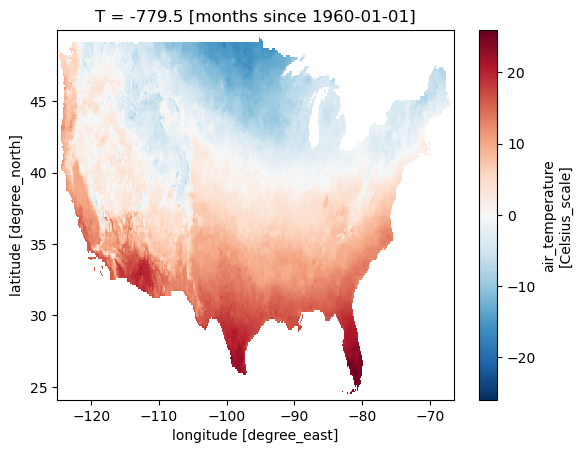

In [7]:
tmax[0].plot()

In [14]:
hvplot.help('scatter')


The `scatter` plot visualizes your points as markers in 2D space. You can visualize
one more dimension by using colors.

The `scatter` plot is a good first way to plot data with non continuous axes.

Reference: https://hvplot.holoviz.org/reference/tabular/scatter.html

Parameters
----------
x : string, optional
    Field name(s) to draw x-positions from. If not specified, the index is
    used. Can refer to continuous and categorical data.
y : string or list, optional
    Field name(s) to draw y-positions from. If not specified, all numerical
    fields are used.
marker : string, optional
    The marker shape specified above can be any supported by matplotlib, e.g. s, d, o etc.
    See https://matplotlib.org/stable/api/markers_api.html.
c : string, optional
    A color or a Field name to draw the color of the marker from
s : int, optional, also available as 'size'
    The size of the marker
by : string, optional
    A single field or list of fields to group by. All the subgroups are v

In [7]:
tmax.hvplot(groupby='T', x='X', y='Y'
            # , width=600, height=500
            , widget_type='scrubber', 
            widget_location='bottom'
          # , rasterize=True, cnorm='eq_hist' # ) # these help automatically sample and scale large data sets
           , geo=True)

Column
    [0] HoloViews(DynamicMap, sizing_mode='fixed', widget_location='bottom', widget_type='scrubber')
    [1] WidgetBox(align=('center', 'end'))
        [0] Player(end=14, width=550)